In [20]:
#Imports

from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import layers
import numpy as np

In [21]:
# Load pre-shuffled MNIST data into train and test sets

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
#Exploring shape of test set

print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape) 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


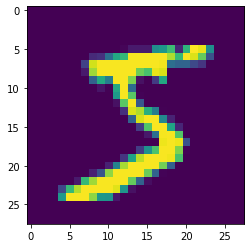

In [23]:
#Plotting the first image of training set

plt.imshow(X_train[0])

In [24]:
# reshaping the dimensions of images upto 4 as required by keras

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# See how it is rehaped

input_shape = (28, 28, 1)

# Making all the values as float to preserve decimal points after a division

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the values to be in the range of 0 - 1

X_train /= 255
X_test /= 255

print(X_train.shape) 
print(X_test.shape) 



(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
# Adding noise of 0.25

noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Adding noise of 0.40

noise_factor = 0.40
X_train_noisy_40 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_40 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_40 = np.clip(X_train_noisy_40, 0. , 1.)
X_test_noisy_40 = np.clip(X_test_noisy_40, 0. , 1.)

# Adding noise of 0.60

noise_factor = 0.60
X_train_noisy_60 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_60 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_60 = np.clip(X_train_noisy_60, 0. , 1.)
X_test_noisy_60 = np.clip(X_test_noisy_60, 0. , 1.)

In [26]:
print(y_train)

# one hot encoding train and test classes 
class_count = 10
y_train = keras.utils.to_categorical(y_train, class_count)
y_test = keras.utils.to_categorical(y_test, class_count)


[5 0 4 ... 5 6 8]


In [27]:
model_25 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_40 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_60 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(class_count, activation="softmax"),
    ]
)

In [28]:
batch_size = 128
epochs = 15

model_25.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_25.fit(X_train_noisy_25, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model_40.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_40.fit(X_train_noisy_40, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model_60.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_60.fit(X_train_noisy_60, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 50s 119ms/step - loss: 0.4658 - accuracy: 0.8602 - val_loss: 0.1109 - val_accuracy: 0.9693
Epoch 2/15
422/422 [==============================] - 48s 113ms/step - loss: 0.1517 - accuracy: 0.9539 - val_loss: 0.0800 - val_accuracy: 0.9787
Epoch 3/15
422/422 [==============================] - 52s 123ms/step - loss: 0.1145 - accuracy: 0.9650 - val_loss: 0.0670 - val_accuracy: 0.9823
Epoch 4/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0962 - accuracy: 0.9704 - val_loss: 0.0599 - val_accuracy: 0.9830
Epoch 5/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.0535 - val_accuracy: 0.9852
Epoch 6/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 7/15
422/422 [==============================] - 48s 114ms/step - loss: 0.0729 - accuracy: 0.9765 - val_loss: 0.0476 - val_ac

In [29]:
score = model_25.evaluate(X_test_noisy_25, y_test, verbose=0)
print("Test loss noise 25:", score[0])
print("Test accuracy noise 25:", score[1])

score = model_40.evaluate(X_test_noisy_40, y_test, verbose=0)
print("Test loss noise 40:", score[0])
print("Test accuracy noise 40:", score[1])

score = model_60.evaluate(X_test_noisy_60, y_test, verbose=0)
print("Test loss noise 60:", score[0])
print("Test accuracy noise 60:", score[1])

Test loss noise 25: 0.037031494081020355
Test accuracy noise 25: 0.9868999719619751
Test loss noise 40: 0.06714973598718643
Test accuracy noise 40: 0.9779999852180481
Test loss noise 60: 0.1590907722711563
Test accuracy noise 60: 0.9506999850273132
